In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Read the CSV file
df = pd.read_csv('project step 2.csv')

# Assuming 'PRICE' is the target variable
target_variable = 'PRICE'

# Extract features and target variable
X = df.drop(target_variable, axis=1)
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_regressor.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
rmsle = np.sqrt(np.mean(np.power(np.log1p(y_test) - np.log1p(y_pred), 2)))

# Print the results
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))
print("Relative Absolute Error (RAE): {:.2f}".format(rae))
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))
print("Root Mean Squared Logarithmic Error (RMSLE): {:.2f}".format(rmsle))


Root Mean Squared Error (RMSE): 21806.11
Relative Absolute Error (RAE): 10845.12
Mean Absolute Percentage Error (MAPE): 8.01%
Root Mean Squared Logarithmic Error (RMSLE): 0.15


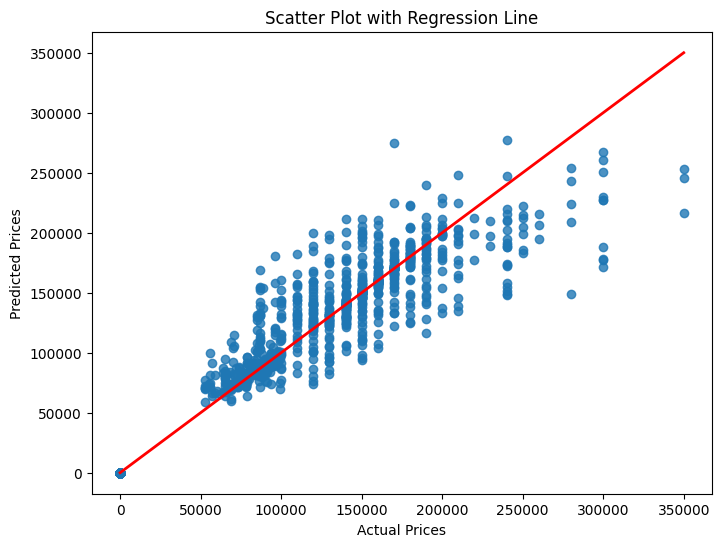

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.8)  # Plot actual vs. predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Add regression line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Scatter Plot with Regression Line")
plt.show()


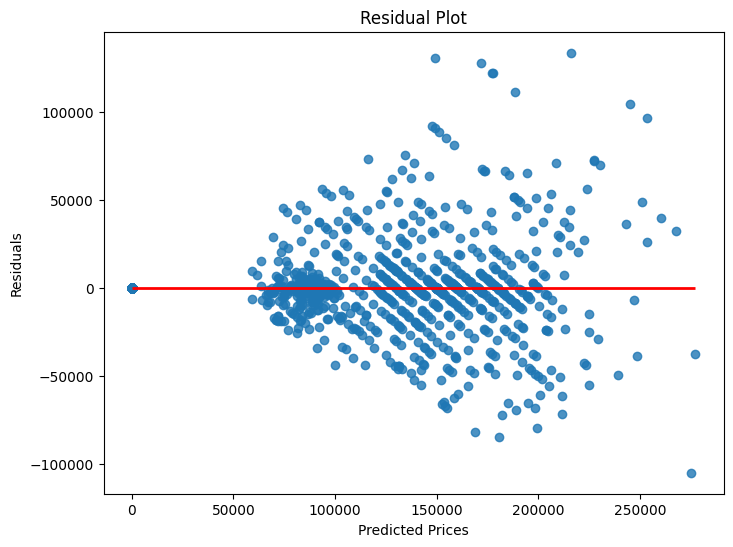

In [4]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.8)  # Plot residuals vs. predicted values
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.hlines(0, y_pred.min(), y_pred.max(), color='red', linewidth=2)  # Add horizontal line at zero
plt.show()


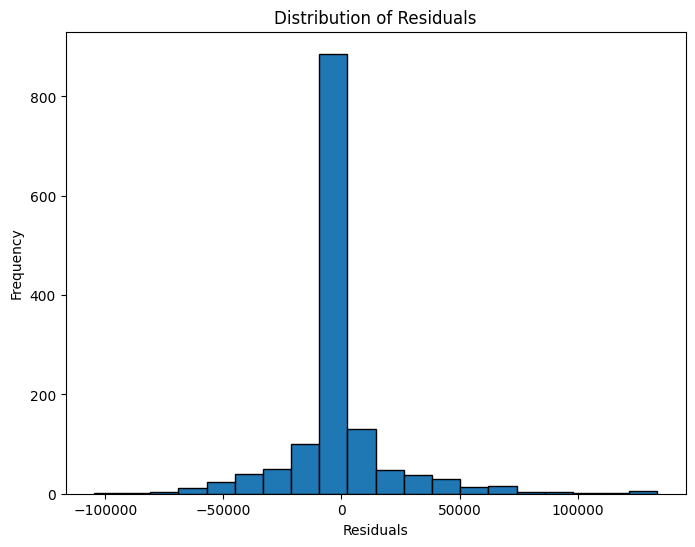

In [5]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='black')  # Plot histogram of residuals
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()


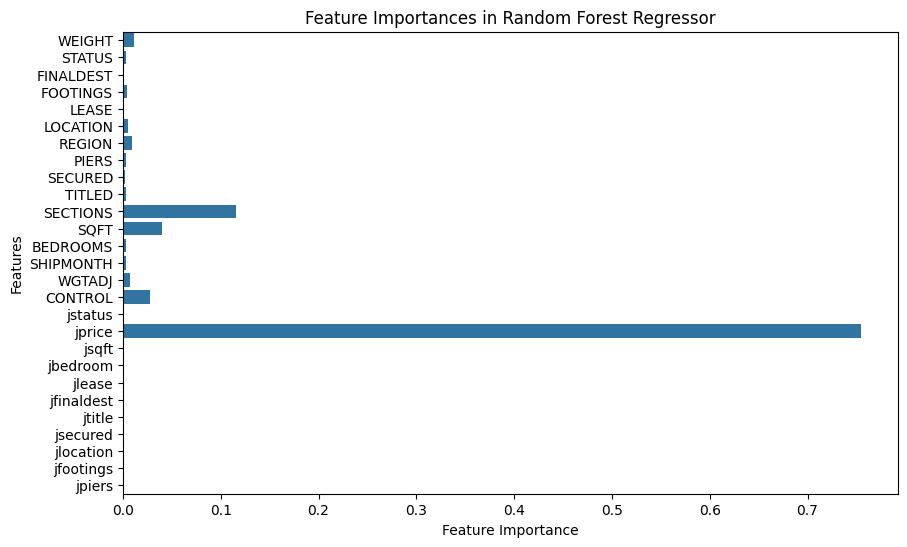

In [6]:
import seaborn as sns

importances = rf_regressor.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances in Random Forest Regressor")
plt.show()


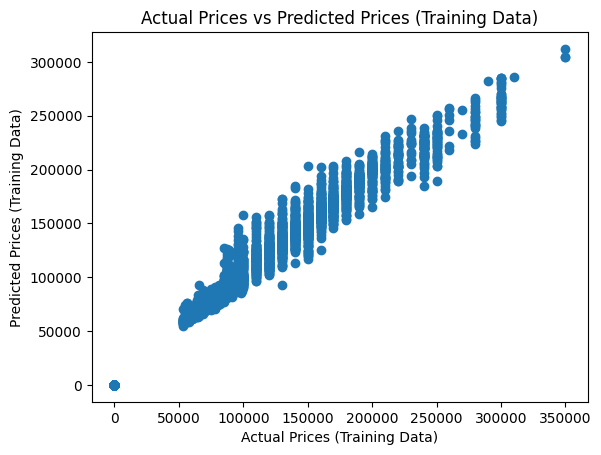

In [7]:
# Prediction on training set
y_train_pred = rf_regressor.predict(X_train)

# Scatter plot for Prediction vs Training Data
plt.scatter(y_train, y_train_pred)
plt.xlabel("Actual Prices (Training Data)")
plt.ylabel("Predicted Prices (Training Data)")
plt.title("Actual Prices vs Predicted Prices (Training Data)")
plt.show()


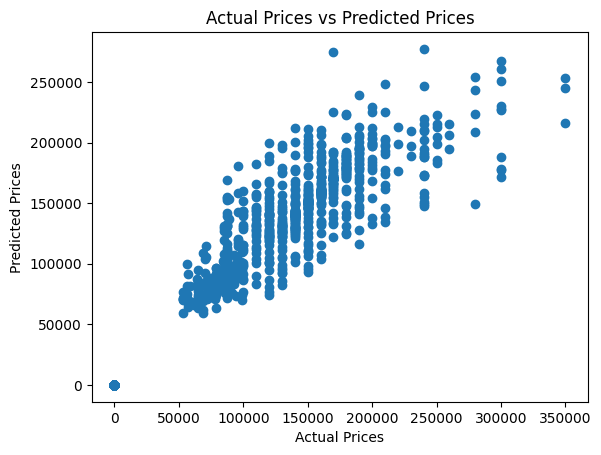

In [8]:
# Scatter plot for Price vs Prediction
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()


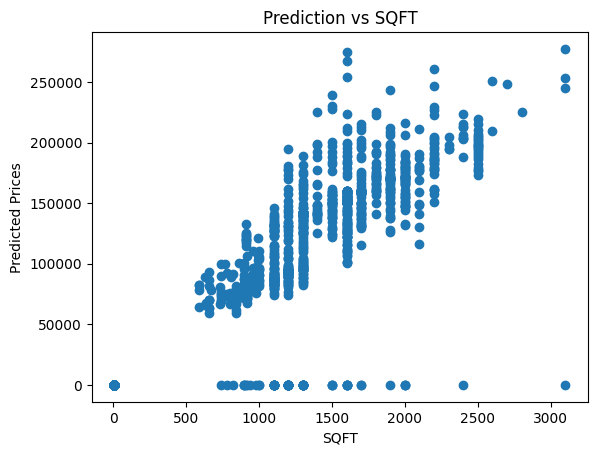

In [11]:
# Scatter plot for Prediction vs SQFT
plt.scatter(X_test['SQFT'], y_pred)
plt.xlabel("SQFT")
plt.ylabel("Predicted Prices")
plt.title("Prediction vs SQFT")
plt.show()


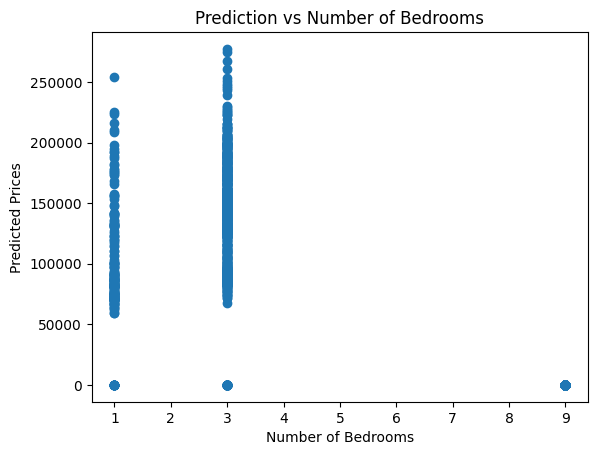

In [12]:
# Assuming 'BEDROOMS' is a feature in your dataset
# Scatter plot for Prediction vs BEDROOMS
plt.scatter(X_test['BEDROOMS'], y_pred)
plt.xlabel("Number of Bedrooms")
plt.ylabel("Predicted Prices")
plt.title("Prediction vs Number of Bedrooms")
plt.show()
